#Starting ou analysis

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import pylab
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import skew, kurtosis

In [2]:
#reading the file and creating a DataFrame

df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#Exploratory Data Analysis

In [3]:
#creating some functions to see some informations of our dataset

def shape (data):
  print("The shape of the dataset is:")
  print("•Number of rows: {}\n•Number of columns: {}".format(data.shape[0],data.shape[1]))
  print('----------------------------------------')

  return None

def info (data):
  print("\nThe information about the dataset is:")
  print(data.info())
  print('----------------------------------------')

  return None

def null_values (data):
  print('Is there any null values?')
  print(data.isnull().sum())
  print('----------------------------------------')

  return None

def describe (data):
  print('The descriptive analysis of the data set:',data.describe().T)
  print('----------------------------------------')
  return None

def columns (data):
  print('The features presents in the dataset is\n',data.columns.tolist())
  print('----------------------------------------')
  return None

def unique (data):
  cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'left', 'promotion_last_5years', 'Work_accident', 'Department', 'salary']
  for col in cols:
    uniq = np.sort(data[col].unique())
    print('The feature',col,'has the unique values of:',uniq)
  print('----------------------------------------')
  return None

if __name__ == '__main__':
    
    shape(df)
    info(df)
    null_values(df)
    describe(df)
    columns(df)
    unique(df)

The shape of the dataset is:
•Number of rows: 14999
•Number of columns: 10
----------------------------------------

The information about the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
----------------------------------------
Is t

#Hypothesis test

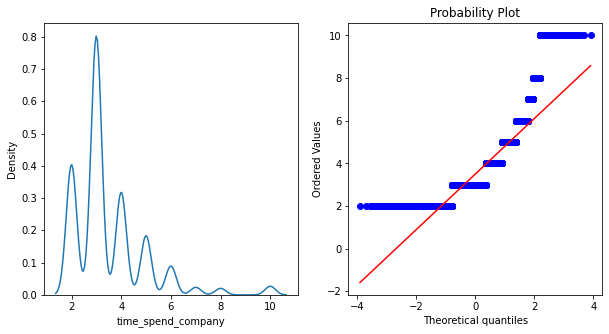

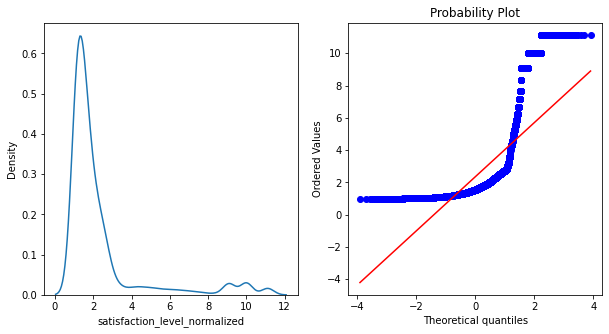

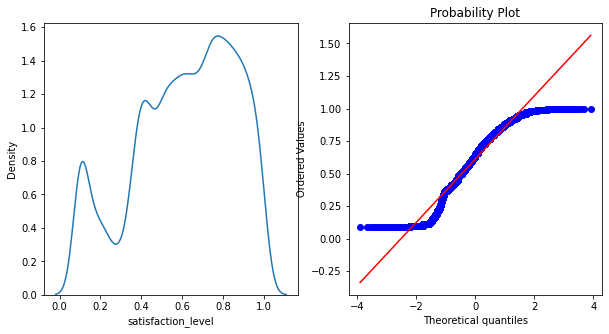

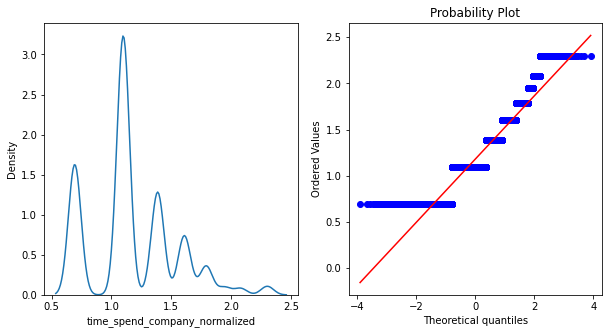

In [4]:
def normalization1(data, feature):
  data['satisfaction_level_normalized']=1/data[feature]
  return 'satisfaction_level_normalized'

def normalization2(data, feature):
  data['time_spend_company_normalized']=np.log(data[feature])
  return 'time_spend_company_normalized'

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

normalization1(df,'satisfaction_level')
normalization2(df, 'time_spend_company')
normality(df,'time_spend_company')
normality(df,'satisfaction_level_normalized')
normality(df,'satisfaction_level')
normality(df,'time_spend_company_normalized')

In [5]:
def chisquare1():
  # contingency table
  table = df.drop(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'Department', 'salary', 'satisfaction_level_normalized'], axis=1)
  stat, p, dof, expected = chi2_contingency(table)
  # interpret test-statistic
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  print('Chi Square teste between Satisfaction Level (normalized) and Left')
  print('Probability = %.3f \nCritical = %.3f \nStat = %.3f' % (prob, critical, stat))
  if abs(stat) >= critical:
    print('Dependent (Reject H0)')
  else:
    print('Independent (Fail to reject H0)')
  # interpret p-value
  alpha = 1.0 - prob
  print('Significance = %.3f \np-value = %.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (Reject H0)')
  else:
    print('Independent (Fail to reject H0)')

  print('-------------------------------')
  return None

def chisquare2():
  # chi-squared test with similar proportions
  from scipy.stats import chi2_contingency
  from scipy.stats import chi2
  # contingency table
  table2 = df.drop(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'Department', 'salary', 'time_spend_company_normalized'], axis=1)
  stat, p, dof, expected = chi2_contingency(table2)
  # interpret test-statistic
  prob = 0.95
  critical2 = chi2.ppf(prob, dof)
  print('Chi Square teste between Time Spent in the company (normalized) and Left')
  print('Probability = %.3f \nCritical = %.3f \nStat = %.3f' % (prob, critical2, stat))
  if abs(stat) >= critical2:
    print('Dependent (Reject H0)')
  else:
    print('Independent (Fail to reject H0)')
  # interpret p-value
  alpha = 1.0 - prob
  print('Significance = %.3f \np-value = %.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (Reject H0)')
  else:
    print('Independent (Fail to reject H0)')
  
  return None

chisquare1()
chisquare2()

Chi Square teste between Satisfaction Level (normalized) and Left
Probability = 0.950 
Critical = 15284.011 
Stat = 6844.420
Independent (Fail to reject H0)
Significance = 0.050 
p-value = 1.000
Independent (Fail to reject H0)
-------------------------------
Chi Square teste between Time Spent in the company (normalized) and Left
Probability = 0.950 
Critical = 15284.011 
Stat = 8143.782
Independent (Fail to reject H0)
Significance = 0.050 
p-value = 1.000
Independent (Fail to reject H0)


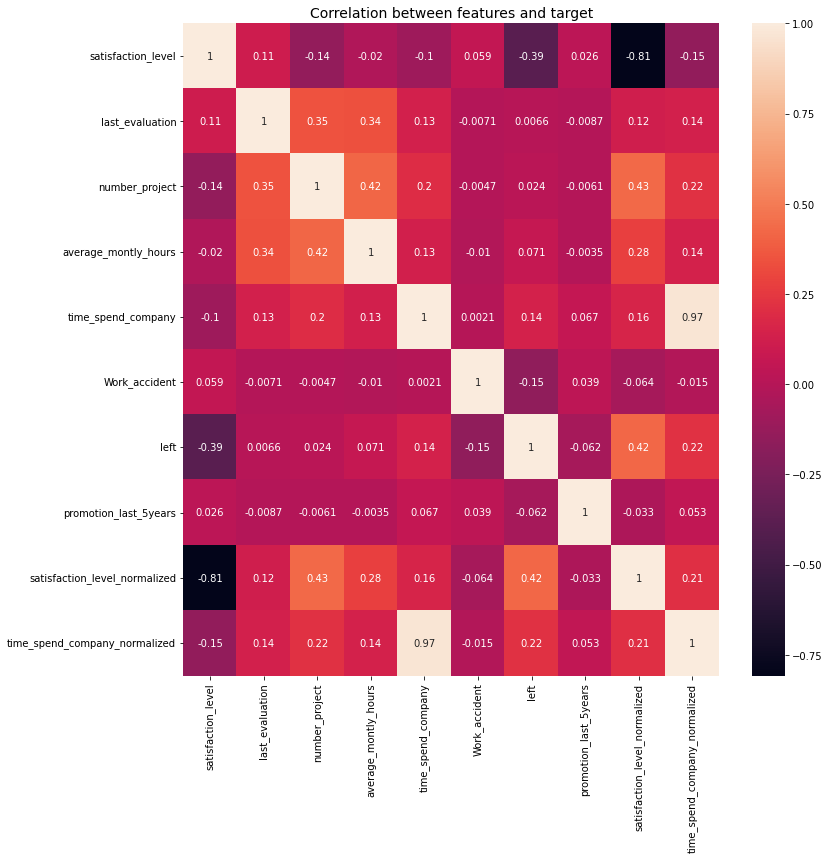

In [6]:
def pearsongraph(data):
  corr = data.corr()
  plt.figure(figsize=(12,12))
  plt.title('Correlation between features and target', fontsize=14)
  sns.heatmap(corr, annot=True)
  return None

pearsongraph(df)

#Making new variables

In [7]:
#subtraction between the last evaluation and the most recent evaluation

df['dif_between_tests'] = df['satisfaction_level'] - df['last_evaluation']
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,satisfaction_level_normalized,time_spend_company_normalized,dif_between_tests
0,0.38,0.53,2,157,3,0,1,0,sales,low,2.631579,1.098612,-0.15
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.250000,1.791759,-0.06
2,0.11,0.88,7,272,4,0,1,0,sales,medium,9.090909,1.386294,-0.77
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.388889,1.609438,-0.15
4,0.37,0.52,2,159,3,0,1,0,sales,low,2.702703,1.098612,-0.15


In [8]:
#average of evaluations
def average(): 
  df2 = df.copy()
  df2['satisfaction_level_mean'] = df2['satisfaction_level'].mean()
  df2['last_evaluation_mean'] = df2['last_evaluation'].mean()
  df2['dif_between_tests_mean'] = df2['dif_between_tests'].mean()
  df_mean = df2.loc[0, ['satisfaction_level_mean',	'last_evaluation_mean',	'dif_between_tests_mean']]
  df_mean = pd.DataFrame(df_mean)
  return df_mean.head()

average()

,0
satisfaction_level_mean,0.612834
last_evaluation_mean,0.716102
dif_between_tests_mean,-0.103268


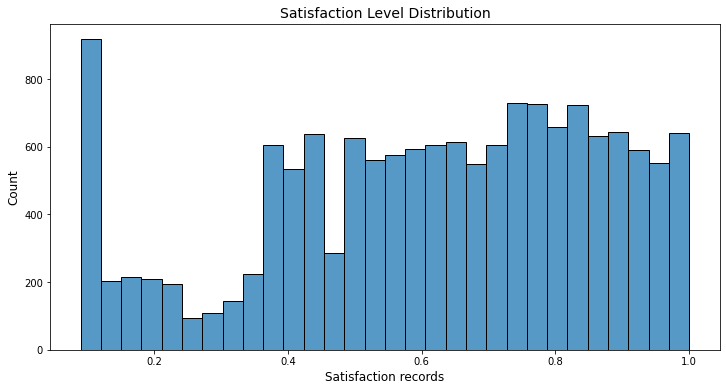

The Satisfaction records distribution has a skewness of: -0.47636034128396443
The Satisfaction records distribution has a kurtosis of: -0.6710350084807528
The mean values for this feature is: 0.6128335222348166
The standard variation for this feature is: 0.2486306510611418
------------------------------------------


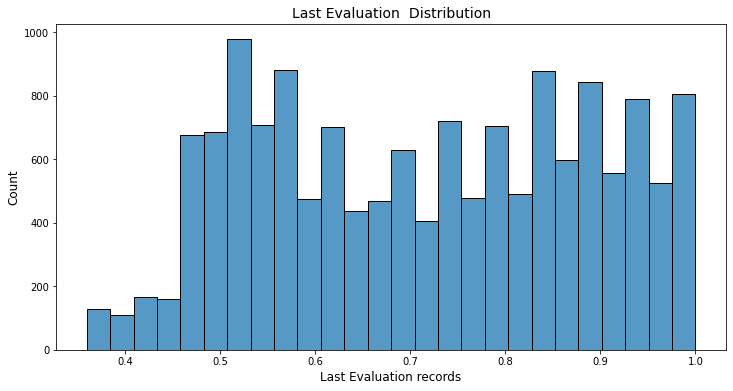

The Last Evaluation records distribution has a skewness of: -0.026621749863760855
The Last Evaluation records distribution has a kurtosis of: -1.2390272795182624
The mean values for this feature is: 0.7161017401159978
The standard variation for this feature is: 0.17116911062327592


In [9]:
# distribution about the evaluations
def distevaluations1():

  plt.figure(figsize = (12,6))
  sns.histplot(data=df, x='satisfaction_level')
  plt.title('Satisfaction Level Distribution', fontsize=14)
  plt.xlabel('Satisfaction records', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.show()

  print('The Satisfaction records distribution has a skewness of: {}'.format(skew(df.satisfaction_level, bias=False)))
  print('The Satisfaction records distribution has a kurtosis of: {}'.format(kurtosis(df.satisfaction_level)))
  print('The mean values for this feature is: {}'.format(df.satisfaction_level.mean()))
  print('The standard variation for this feature is: {}'.format(df.satisfaction_level.std()))
  print('------------------------------------------')

  return None

def distevaluations2():

  plt.figure(figsize = (12,6))

  sns.histplot(data=df, x='last_evaluation')
  plt.title('Last Evaluation  Distribution', fontsize=14)
  plt.xlabel('Last Evaluation records', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.show()

  print('The Last Evaluation records distribution has a skewness of: {}'.format(skew(df.last_evaluation, bias=False)))
  print('The Last Evaluation records distribution has a kurtosis of: {}'.format(kurtosis(df.last_evaluation)))
  print('The mean values for this feature is: {}'.format(df.last_evaluation.mean()))
  print('The standard variation for this feature is: {}'.format(df.last_evaluation.std()))

  return None

distevaluations1()
distevaluations2()

#Analysis of the churn

In [10]:
# employees quantity
num_employee = len(df)

a = df.query('left == 0').shape[0]
b = df.query('left == 1').shape[0]
print('Based on the data, {0} employees left and {1} did not.'.format(a, b))

c = df.query('left == 0').shape[0]/num_employee*100
d = df.query('left == 1').shape[0]/num_employee*100
print('Based on the data, {0:,.2f}% employees left and {1:,.2f}% did not.'.format(c, d))

Based on the data, 11428 employees left and 3571 did not.
Based on the data, 76.19% employees left and 23.81% did not.


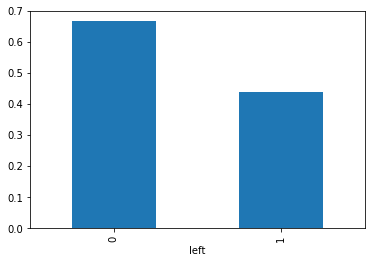

In [11]:
# grouping the features to understand the influence in churn
df.groupby('left').mean()

# ploting satisfaction_level
df.groupby('left')['satisfaction_level'].mean().plot(kind='bar')

In [12]:
 df[df['salary'] == 'low'].groupby('left').count().iloc[1,0]

2172

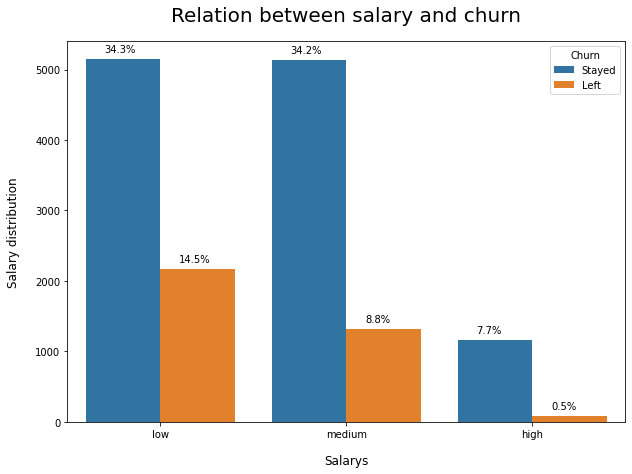


The quantity of employes with low salary and has left the companys is 5144 and those whose stayed is 2172.
The quantity of employes with medium salary and has left the companys is 5129 and those whose stayed is 1317
The quantity of employes with high salary and has left the companys is 1155 and those whose stayed is 82


In [13]:
# vizualization of salary and churn
def salartychurn():
  plt.figure(figsize=(10,7))
  ax=sns.countplot(data=df, x='salary', hue='left')
  plt.ylabel('Salary distribution', fontsize=12, labelpad=15)
  plt.xlabel('Salarys', fontsize=12, labelpad=15)
  plt.title('Relation between salary and churn',color = 'black',fontsize=20, pad=20)
  plt.legend(title='Churn', loc='upper right', labels=['Stayed', 'Left'])
  total = len(df)
  for p in ax.patches:
          ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))
  plt.show()

  return None

def values():
  df_salary_low = df[df['salary'] == 'low'].groupby('left').count()
  df_salary_medium = df[df['salary'] == 'medium'].groupby('left').count()
  df_salary_high = df[df['salary'] == 'high'].groupby('left').count()

  print('\nThe quantity of employes with low salary and has left the companys is {} and those whose stayed is {}.'.format(df_salary_low.iloc[0,0], df_salary_low.iloc[1,0]))
  print('The quantity of employes with medium salary and has left the companys is {} and those whose stayed is {}'.format(df_salary_medium.iloc[0,0], df_salary_medium.iloc[1,0]))
  print('The quantity of employes with high salary and has left the companys is {} and those whose stayed is {}'.format(df_salary_high.iloc[0,0], df_salary_high.iloc[1,0]))
  return None

salartychurn()
values()

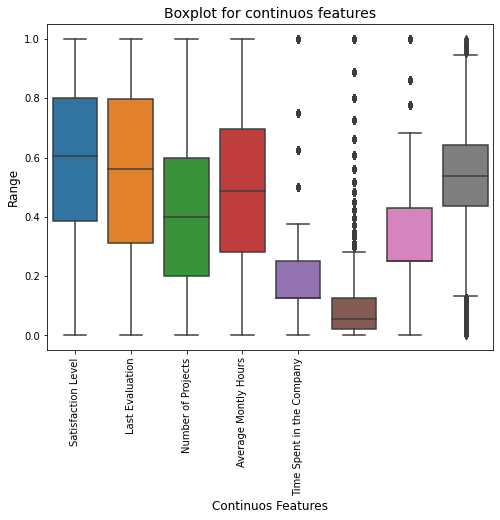


The mean, medium, and quartiles for Satisfaction Level is: 0.6128335222348166
The medium, and quartiles for Satisfaction Level is: 0.64
The quartiles for Satisfaction Level is: [0.44 0.64 0.82]

The mean, medium, and quartiles for Last Evaluation is: 0.7161017401159978
The medium, and quartiles for Last Evaluation is: 0.72
The quartiles for Last Evaluation is: [0.56 0.72 0.87]

The mean, medium, and quartiles for Number of Projects is: 3.80305353690246
The medium, and quartiles for Number of Projects is: 4.0
The quartiles for Number of Projects is: [3. 4. 5.]

The mean, medium, and quartiles for Average Montly Hoursl is: 201.0503366891126
The medium, and quartiles for Average Montly Hours is: 200.0
The quartiles for Average Montly Hours is: [156. 200. 245.]

The mean, medium, and quartiles for Time Spent in the Company is: 3.498233215547703
The medium, and quartiles for Time Spent in the Company is: 3.0
The quartiles for Time Spent in the Company is: [3. 3. 4.]


In [14]:
def boxplotscaled():
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(df.drop(['Department', 'salary', 'promotion_last_5years', 'left', 'Work_accident'], axis=1))

  plt.figure(figsize=(8,6))
  sns.boxplot(data=scaled)
  plt.title('Boxplot for continuos features', fontsize=14)
  plt.xlabel('Continuos Features', fontsize=12)
  plt.ylabel('Range', fontsize=12)
  plt.xticks([0, 1, 2, 3, 4], ['Satisfaction Level', 'Last Evaluation', 'Number of Projects', 'Average Montly Hours', 'Time Spent in the Company'], rotation=90)
  plt.show()
  return None

def status():

  print('\nThe mean, medium, and quartiles for Satisfaction Level is: {}'.format(df.satisfaction_level.mean()))
  print('The medium, and quartiles for Satisfaction Level is: {}'.format(df.satisfaction_level.median()))
  print('The quartiles for Satisfaction Level is: {}'.format(df.satisfaction_level.quantile([0.25,0.5,0.75]).values))

  print('\nThe mean, medium, and quartiles for Last Evaluation is: {}'.format(df.last_evaluation.mean()))
  print('The medium, and quartiles for Last Evaluation is: {}'.format(df.last_evaluation.median()))
  print('The quartiles for Last Evaluation is: {}'.format(df.last_evaluation.quantile([0.25,0.5,0.75]).values))

  print('\nThe mean, medium, and quartiles for Number of Projects is: {}'.format(df.number_project.mean()))
  print('The medium, and quartiles for Number of Projects is: {}'.format(df.number_project.median()))
  print('The quartiles for Number of Projects is: {}'.format(df.number_project.quantile([0.25,0.5,0.75]).values))

  print('\nThe mean, medium, and quartiles for Average Montly Hoursl is: {}'.format(df.average_montly_hours.mean()))
  print('The medium, and quartiles for Average Montly Hours is: {}'.format(df.average_montly_hours.median()))
  print('The quartiles for Average Montly Hours is: {}'.format(df.average_montly_hours.quantile([0.25,0.5,0.75]).values))

  print('\nThe mean, medium, and quartiles for Time Spent in the Company is: {}'.format(df.time_spend_company.mean()))
  print('The medium, and quartiles for Time Spent in the Company is: {}'.format(df.time_spend_company.median()))
  print('The quartiles for Time Spent in the Company is: {}'.format(df.time_spend_company.quantile([0.25,0.5,0.75]).values))
  return None

boxplotscaled()
status()

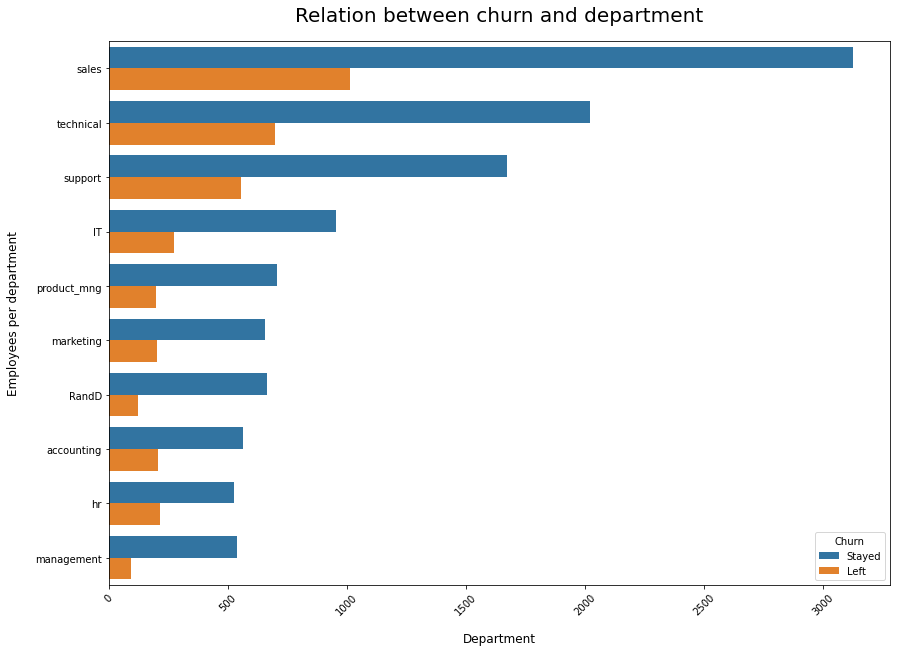


The quantity of employes in the sales department and has left the companys is 3126 and those whose stayed is 1014.
The quantity of employes in technical department and has left the companys is 2023 and those whose stayed is 697
The quantity of employes support department and has left the companys is 1674 and those whose stayed is 555
The quantity of employes in the IT department and has left the companys is 954 and those whose stayed is 273.
The quantity of employes in product management department and has left the companys is 704 and those whose stayed is 198
The quantity of employes marketing department and has left the companys is 655 and those whose stayed is 203
The quantity of employes in the rand department and has left the companys is 666 and those whose stayed is 121.
The quantity of employes in accounting department and has left the companys is 563 and those whose stayed is 204
The quantity of employes HR department and has left the companys is 524 and those whose stayed is 

In [15]:
# vizualization of department and churn
def churn1():
  plt.figure(figsize=(14,10))
  sns.countplot(data=df, y='Department', hue='left', order=df.Department.value_counts().index)
  plt.ylabel('Employees per department', fontsize=12, labelpad=15)
  plt.xlabel('Department', fontsize=12, labelpad=15)
  plt.title('Relation between churn and department',color = 'black',fontsize=20, pad=20)
  plt.legend(title='Churn', loc='lower right', labels=['Stayed', 'Left'])
  plt.xticks(rotation=45)
  plt.show()
  return None


def values1():
  df_dp1 = df[df['Department'] == 'sales'].groupby('left').count()
  df_dp2 = df[df['Department'] == 'technical'].groupby('left').count()
  df_dp3 = df[df['Department'] == 'support'].groupby('left').count()
  df_dp4 = df[df['Department'] == 'IT'].groupby('left').count()
  df_dp5 = df[df['Department'] == 'product_mng'].groupby('left').count()
  df_dp6 = df[df['Department'] == 'marketing'].groupby('left').count()
  df_dp7 = df[df['Department'] == 'RandD'].groupby('left').count()
  df_dp8 = df[df['Department'] == 'accounting'].groupby('left').count()
  df_dp9 = df[df['Department'] == 'hr'].groupby('left').count()
  df_dp10 = df[df['Department'] == 'management'].groupby('left').count()


  print('\nThe quantity of employes in the sales department and has left the companys is {} and those whose stayed is {}.'
  .format(df_dp1.iloc[0,0], df_dp1.iloc[1,0]))
  print('The quantity of employes in technical department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp2.iloc[0,0], df_dp2.iloc[1,0]))
  print('The quantity of employes support department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp3.iloc[0,0], df_dp3.iloc[1,0]))
  print('The quantity of employes in the IT department and has left the companys is {} and those whose stayed is {}.'
  .format(df_dp4.iloc[0,0], df_dp4.iloc[1,0]))
  print('The quantity of employes in product management department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp5.iloc[0,0], df_dp5.iloc[1,0]))
  print('The quantity of employes marketing department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp6.iloc[0,0], df_dp6.iloc[1,0]))
  print('The quantity of employes in the rand department and has left the companys is {} and those whose stayed is {}.'
  .format(df_dp7.iloc[0,0], df_dp7.iloc[1,0]))
  print('The quantity of employes in accounting department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp8.iloc[0,0], df_dp8.iloc[1,0]))
  print('The quantity of employes HR department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp9.iloc[0,0], df_dp9.iloc[1,0]))
  print('The quantity of employes management department and has left the companys is {} and those whose stayed is {}'
  .format(df_dp10.iloc[0,0], df_dp10.iloc[1,0]))
  return None

churn1()
values1()

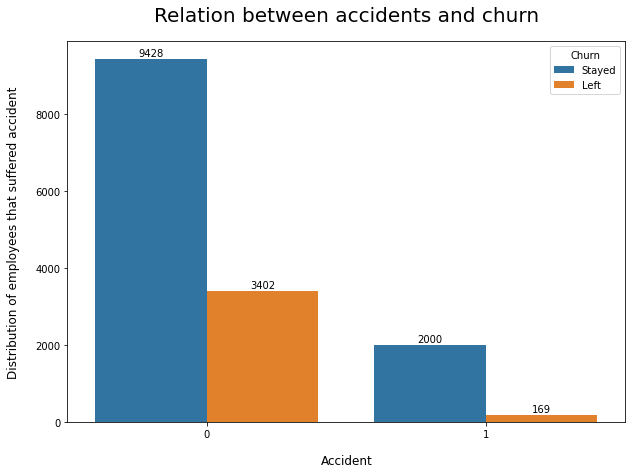

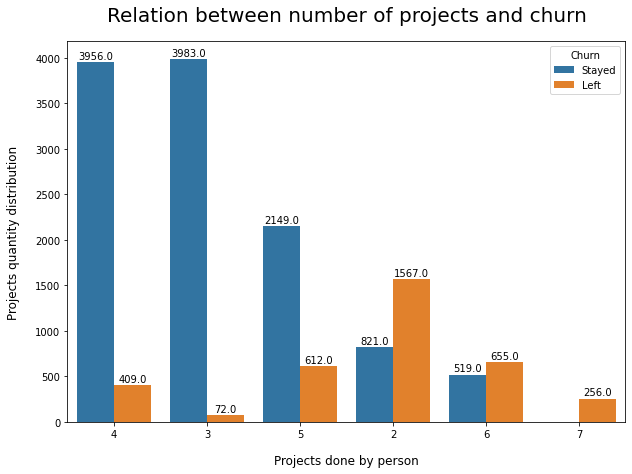

In [25]:
def acdchurn():
  plt.figure(figsize=(10,7))
  ax1=sns.countplot(data=df, x='Work_accident', hue='left')
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                      (p.get_x() + p.get_width()/2, p.get_height()),
                      ha='center', 
                      va='center', 
                      xytext=(0,6),
                      textcoords='offset points')
  plt.ylabel('Distribution of employees that suffered accident', fontsize=12, labelpad=15)
  plt.xlabel('Accident', fontsize=12, labelpad=15)
  plt.title('Relation between accidents and churn',color = 'black',fontsize=20, pad=20)
  plt.legend(title='Churn', loc='upper right', labels=['Stayed', 'Left'])
  plt.show()
  return None

def projectchurn():
  plt.figure(figsize=(10,7))
  ax1=sns.countplot(data=df, x='number_project', hue='left', order=df.number_project.value_counts().index)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                        (p.get_x() + p.get_width()/2, p.get_height()),
                        ha='center', 
                        va='center', 
                        xytext=(0,6),
                        textcoords='offset points')
  plt.ylabel('Projects quantity distribution', fontsize=12, labelpad=15)
  plt.xlabel('Projects done by person', fontsize=12, labelpad=15)
  plt.title('Relation between number of projects and churn',color = 'black',fontsize=20, pad=20)
  plt.legend(title='Churn', loc='upper right', labels=['Stayed', 'Left'])
  plt.show()
  return None


acdchurn()
projectchurn()

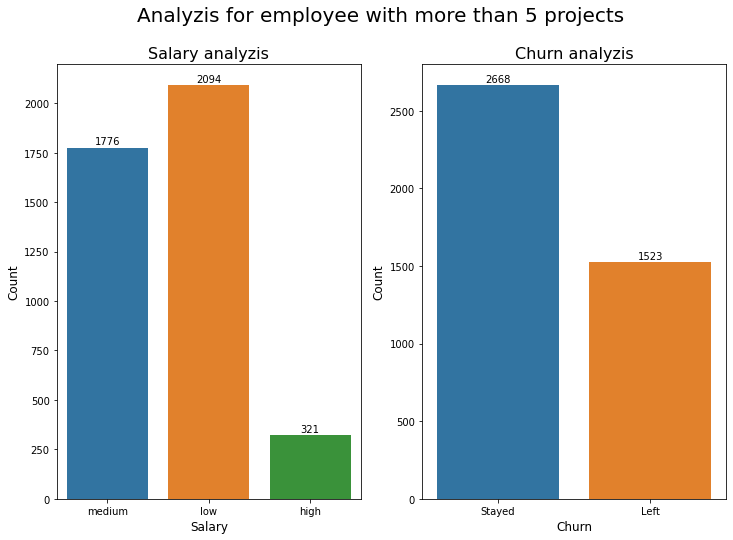

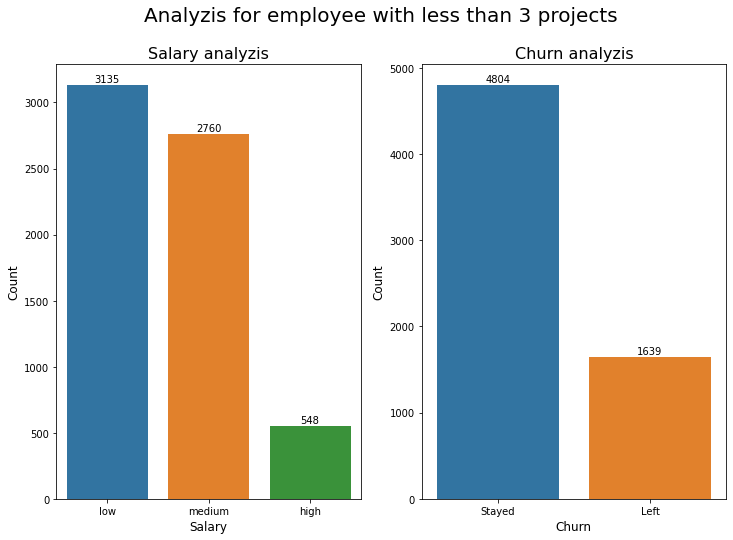

In [281]:
df_moreprojects=df[df['number_project'] >= 5]
df_lessprojects=df[df['number_project'] <= 3]

def moreprojects():

  plt.figure(figsize=(12,8))
  plt.suptitle('Analyzis for employee with more than 5 projects', fontsize=20)

  plt.subplot(121)
  ax1=sns.countplot(x='salary', data=df_moreprojects)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Salary analyzis', fontsize=16)
  plt.xlabel('Salary', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.subplot(122)
  ax2=sns.countplot(x='left', data=df_moreprojects)
  for p in ax2.patches:
    ax2.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Churn analyzis', fontsize=16)
  plt.xlabel('Churn', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks([0, 1], ['Stayed', 'Left'])
  plt.show()
  return None


def lessprojects():

  plt.figure(figsize=(12,8))
  plt.suptitle('Analyzis for employee with less than 3 projects', fontsize=20)

  plt.subplot(121)
  ax1=sns.countplot(x='salary', data=df_lessprojects)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Salary analyzis', fontsize=16)
  plt.xlabel('Salary', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.subplot(122)
  ax2=sns.countplot(x='left', data=df_lessprojects)
  for p in ax2.patches:
    ax2.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Churn analyzis', fontsize=16)
  plt.xlabel('Churn', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks([0, 1], ['Stayed', 'Left'])
  plt.show()
  return None

moreprojects()
print('\n')
lessprojects()

In [39]:
df.quantile([0.25, 0.50, 0.75])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level_normalized,time_spend_company_normalized,dif_between_tests
0.25,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,1.219512,1.098612,-0.23
0.50,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,1.562500,1.098612,-0.08
0.75,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,2.272727,1.386294,0.08


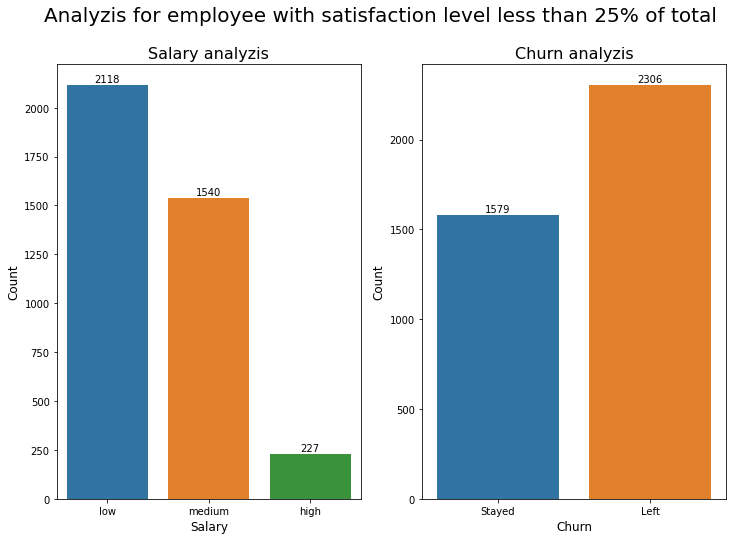

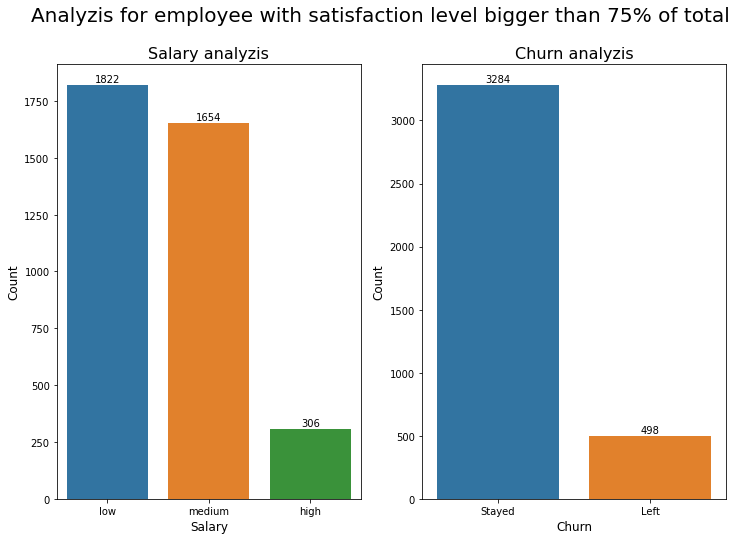

In [71]:
df_highersatisfactions = df[df['satisfaction_level'] >= 0.82]
df_lowrsatisfactions = df[df['satisfaction_level'] <= 0.44]

def thirdquantile():

  plt.figure(figsize=(12,8))
  plt.suptitle('Analyzis for employee with satisfaction level bigger than 75% of total', fontsize=20)

  plt.subplot(121)
  ax1=sns.countplot(x='salary', data=df_highersatisfactions)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Salary analyzis', fontsize=16)
  plt.xlabel('Salary', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.subplot(122)
  ax2=sns.countplot(x='left', data=df_highersatisfactions)
  for p in ax2.patches:
    ax2.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Churn analyzis', fontsize=16)
  plt.xlabel('Churn', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks([0, 1], ['Stayed', 'Left'])
  plt.show()
  return None

def firstquantile():

  plt.figure(figsize=(12,8))
  plt.suptitle('Analyzis for employee with satisfaction level less than 25% of total', fontsize=20)

  plt.subplot(121)
  ax1=sns.countplot(x='salary', data=df_lowrsatisfactions)
  for p in ax1.patches:
    ax1.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Salary analyzis', fontsize=16)
  plt.xlabel('Salary', fontsize=12)
  plt.ylabel('Count', fontsize=12)

  plt.subplot(122)
  ax2=sns.countplot(x='left', data=df_lowrsatisfactions)
  for p in ax2.patches:
    ax2.annotate(format(str((p.get_height()))), 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', 
                          va='center', 
                          xytext=(0,6),
                          textcoords='offset points')
  plt.title('Churn analyzis', fontsize=16)
  plt.xlabel('Churn', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks([0, 1], ['Stayed', 'Left'])
  plt.show()
  return None

firstquantile()
thirdquantile()

#Feature Engineering

In [194]:
def dummies():
  subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
  salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
  df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
  df_with_dummies.drop('salary',axis='columns',inplace=True)
  departments = pd.get_dummies(df.Department)
  df_with_more_dummies = pd.concat([df_with_dummies, departments], axis='columns')
  return df_with_more_dummies

dummies()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,157,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,262,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,272,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,223,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,159,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,160,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,143,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,280,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [195]:
# setting features

u=df_with_more_dummies
t=df.left

#Base line

In [193]:
# acuracia dumy para logsitic
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(X_train, y_train)
acuracia = dummy_stratified.score(X_test, y_test) * 100

print("Our baseline had an acuraccy %.2f%%" % acuracia)

Our baseline had an acuraccy 76.34%


In [122]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled2 = scaler.fit_transform(u)

#LogisticRegression

In [227]:
#importing libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [210]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(u,t,train_size=0.3)

SEED = 10
np.random.seed(SEED)

In [200]:
# creating the model
model = LogisticRegression(random_state=SEED)
model.fit(X_train, y_train)

# score
LogisticScore = model.score(X_test,y_test)

print('The LogisticRegression without normalization had a score of {}%'.format((LogisticScore*100).round(2)))

The LogisticRegression without normalization had a score of 77.1%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [246]:
# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(u)

# splitting
X_train, X_test, y_train, y_test = train_test_split(scaled,t,train_size=0.3)

SEED = 10
np.random.seed(SEED)

# creating the model
model = LogisticRegression(random_state=SEED)
model.fit(X_train, y_train)

LogisticScore = model.score(X_test,y_test)

print('The LogisticRegression normalized had a score of {}%'.format((LogisticScore*100).round(2)))

The LogisticRegression normalized had a score of 77.12%


In [208]:
cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, scaled, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, scaled, t, cv = 3, return_train_score=False)

print('KFold:')
imprime_resultados(results_cross)
print('-----------')
print('Cross validation:')
imprime_resultados(results_kf)

KFold:
Average accuracy: 77.53
Accuracy interval: [77.34, 77.71]
-----------
Cross validation:
Average accuracy: 77.61
Accuracy interval: [75.89, 79.34]


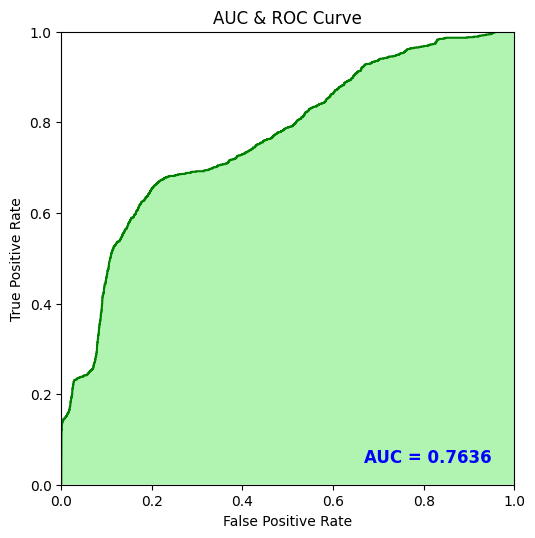

In [247]:
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Decision Tree

In [250]:
# model
model = DecisionTreeClassifier(random_state=SEED, max_depth=20)
model.fit(X_train, y_train)

DecisionTreeScore = model.score(X_test, y_test)

print('The DecisionTree without normalization had a score of {}%'.format((DecisionTreeScore*100).round(2)))

The DecisionTree without normalization had a score of 90.91%


In [251]:
cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, u, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, u, t, cv = 3, return_train_score=False)

print('KFold:')
imprime_resultados(results_cross)
print('-----------')
print('Cross validation:')
imprime_resultados(results_kf)

KFold:
Average accuracy: 91.98
Accuracy interval: [90.34, 93.62]
-----------
Cross validation:
Average accuracy: 92.65
Accuracy interval: [91.20, 94.11]


In [273]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(scaled,t,test_size=0.3)


# model
model = DecisionTreeClassifier(random_state=SEED, max_depth=20)
model.fit(X_train, y_train)

DecisionTreeScore = model.score(X_test, y_test)

print('The DecisionTree normalized had a score of {}%'.format((DecisionTreeScore*100).round(2)))

The DecisionTree normalized had a score of 92.53%


In [253]:
cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, scaled, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, scaled, t, cv = 3, return_train_score=False)

print('KFold:')
imprime_resultados(results_cross)
print('-----------')
print('Cross validation:')
imprime_resultados(results_kf)

KFold:
Average accuracy: 91.97
Accuracy interval: [90.38, 93.55]
-----------
Cross validation:
Average accuracy: 92.84
Accuracy interval: [91.65, 94.03]


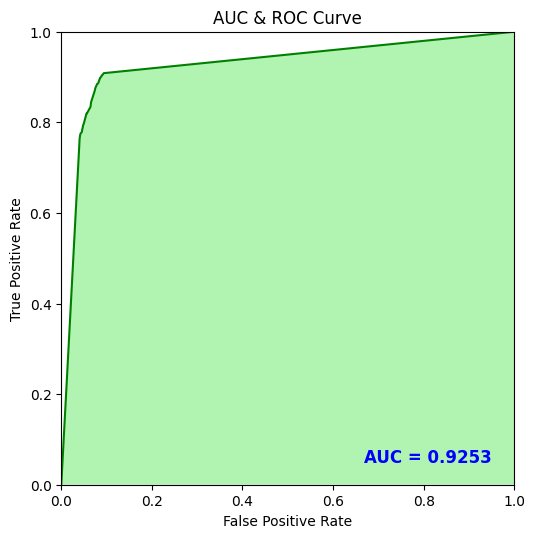

In [254]:
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#RandomForest

In [255]:
# model
model = RandomForestRegressor(random_state=SEED, n_jobs=-1, n_estimators=300)
model.fit(X_train, y_train)

RandomForestScore = model.score(X_test, y_test)

print('The RandomForestRegressor without normalization had a score of {}%'.format((RandomForestScore*100).round(2)))

The RandomForestRegressor without normalization had a score of 74.22%


In [226]:
cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, u, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, u, t, cv = 3, return_train_score=False)

print('KFold:')
imprime_resultados(results_cross)
print('-----------')
print('Cross validation:')
imprime_resultados(results_kf)

KFold:
Average accuracy: 51.02
Accuracy interval: [-22.29, 124.34]
-----------
Cross validation:
Average accuracy: 77.64
Accuracy interval: [74.31, 80.97]


In [256]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(scaled2,t,test_size=0.3, random_state=SEED)

# model
model = RandomForestRegressor(random_state=SEED, n_jobs=-1, n_estimators=300)
model.fit(X_train, y_train)

RandomForestScore = model.score(X_test, y_test)

print('The RandomForestRegressor had a score of {}%'.format((RandomForestScore*100).round(2)))

The RandomForestRegressor had a score of 73.17%


In [224]:
cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, scaled, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, scaled, t, cv = 3, return_train_score=False)

print('KFold:')
imprime_resultados(results_cross)
print('-----------')
print('Cross validation:')
imprime_resultados(results_kf)

KFold:
Average accuracy: 51.02
Accuracy interval: [-22.28, 124.31]
-----------
Cross validation:
Average accuracy: 77.78
Accuracy interval: [72.16, 83.40]


#LGBMClassifier

In [258]:
mdl = LGBMClassifier (random_state=SEED)
mdl.fit(X_train, y_train)

LGBMClassifierScore = mdl.score(X_test, y_test)
print('The LGBMClassifer had a score of {}%'.format((LGBMClassifierScore*100).round(2)))

The LGBMClassifer had a score of 92.56%


In [259]:
p = mdl.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, p)

0.9621946422122478

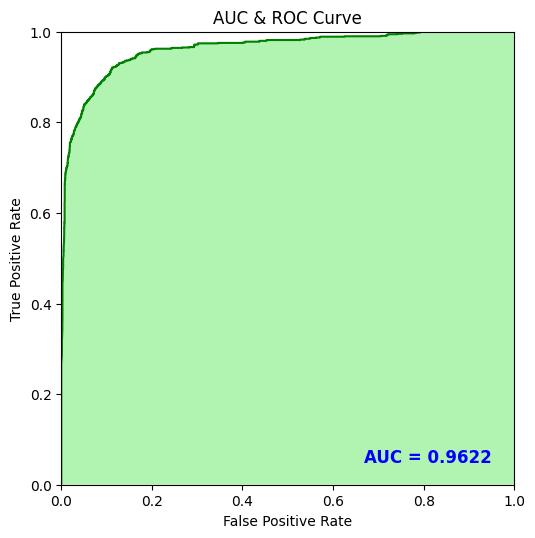

In [260]:
y_pred_proba = mdl.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [98]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.4 MB/s 


In [112]:
from skopt import dummy_minimize

In [261]:
def treinar_model(params):
  learning_rate = params[0] #aprendizagem por árvore
  num_leaves = params[1] #número maxímo de folhas
  min_child_samples = params[2] #exemplos por nó
  subsample = params[3] #amostra por árvore
  colsample_bytree = params[4] #limite de variável por árvore

  print(params)

  mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, 
                       min_child_samples=min_child_samples, subsample=subsample, 
                       colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1,
                       n_estimators=100)
  
  mdl.fit(X_train, y_train)

  p = mdl.predict_proba(X_test)[:, 1]

  return -roc_auc_score(y_test, p)

space = [(1e-3, 1e-1, 'log-uniform'),
         (2, 128),
         (1, 100),
         (0.05, 1.0),
         (0.1, 1.0)]

resultado = dummy_minimize(treinar_model, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 4.2374
Function value obtained: -0.9523
Current minimum: -0.9523
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.2177
Function value obtained: -0.9342
Current minimum: -0.9523
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3384
Function value obtained: -0.9451
Current minimum: -0.9523
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 

In [263]:
resultado.x

[0.061911658253265375, 96, 61, 0.9665980447909663, 0.6970973480366033]

In [265]:
  mdl = LGBMClassifier(learning_rate=0.0619, num_leaves=96, 
                       min_child_samples=61, subsample=0.966, 
                       colsample_bytree=0.697, random_state=0, subsample_freq=1,
                       n_estimators=100)
  
  mdl.fit(X_train, y_train)

  p = mdl.predict_proba(X_test)[:, 1]

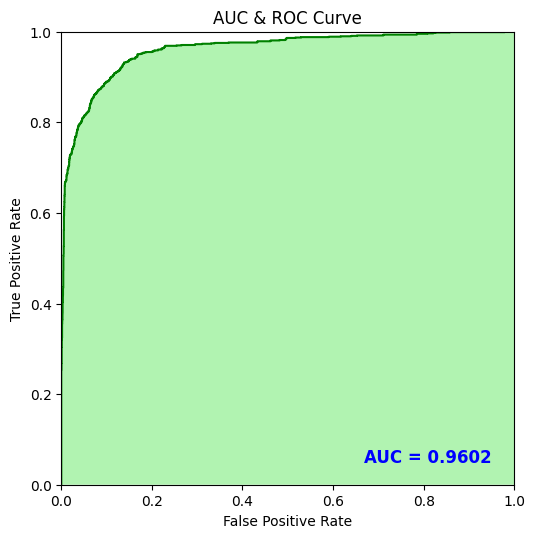

In [266]:
y_pred_proba = mdl.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Bayesian Optimization

In [267]:
from skopt import gp_minimize

In [268]:
resultados_gp = gp_minimize(treinar_model, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2331
Function value obtained: -0.9395
Current minimum: -0.9395
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.3036
Function value obtained: -0.9487
Current minimum: -0.9487
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2429
Function value obtained: -0.9390
Current minimum: -0.9487
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3

In [269]:
#best params

resultado.x

[0.061911658253265375, 96, 61, 0.9665980447909663, 0.6970973480366033]

#Aprimorando o DecisionTree

In [270]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,8, 13],
           "min_samples_leaf":[1,2,3,4,5,6],
           "max_leaf_nodes":[None,1,2,3,4] }

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [275]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.178 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.191 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.177 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.206 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.216 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.202 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-0.178 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-0.191 total time=   0.0s
[CV 3/3] EN

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=20, random_state=10),
             param_grid={'max_depth': [1, 3, 5, 8, 13],
                         'max_leaf_nodes': [None, 1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [276]:
tuning_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [277]:
# importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

SEED = 10
np.random.seed(SEED)

# spliting
X_train, X_test, y_train, y_test = train_test_split(u,t,test_size=0.25)


# model
model = DecisionTreeClassifier(random_state=SEED, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter = 'best')
model.fit(X_train, y_train)

DecisionTreeScore = model.score(X_test, y_test)

print('The DecisionTree had a score of {}%'.format((DecisionTreeScore*100).round(2)))

The DecisionTree had a score of 91.09%


In [278]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = True)
results_kf = cross_validate(model, scaled, t, cv = cv, return_train_score=False)
results_cross = cross_validate(model, scaled, t, cv = 3, return_train_score=False)

imprime_resultados(results_cross)
print('-----------')
imprime_resultados(results_kf)

Average accuracy: 91.57
Accuracy interval: [91.13, 92.02]
-----------
Average accuracy: 91.57
Accuracy interval: [89.99, 93.14]


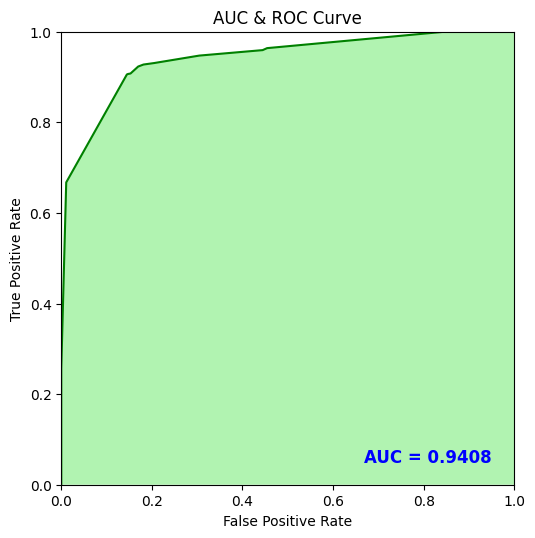

In [279]:
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()